Data shape: (32, 15)
                timestamp  pm2_5   pm10   no2   so2      co      o3  \
0 2026-01-16 21:59:02.000  29.75  74.19  0.19  0.36  137.48  107.01   
1 2026-01-16 22:46:43.000  29.78  75.59  0.19  0.35  138.22  106.42   
2 2026-01-15 12:57:23.218  29.78  75.59  0.19  0.35  138.22  106.42   
3 2026-01-15 13:57:17.941  29.78  75.59  0.19  0.35  138.22  106.42   
4 2026-01-15 14:57:16.296  29.78  75.59  0.19  0.35  138.22  106.42   

   temperature  humidity  pressure  hour  day  month        aqi  aqi_change  
0        20.07        83      1014    21   16      1  58.163333         NaN  
1        19.07        82      1014    22   16      1  58.425000         NaN  
2        19.07        82      1014    12   15      1  58.425000         0.0  
3        19.07        82      1014    13   15      1  58.425000         0.0  
4        19.07        82      1014    14   15      1  58.425000         0.0  
                           timestamp      pm2_5       pm10    no2        so2  \
coun

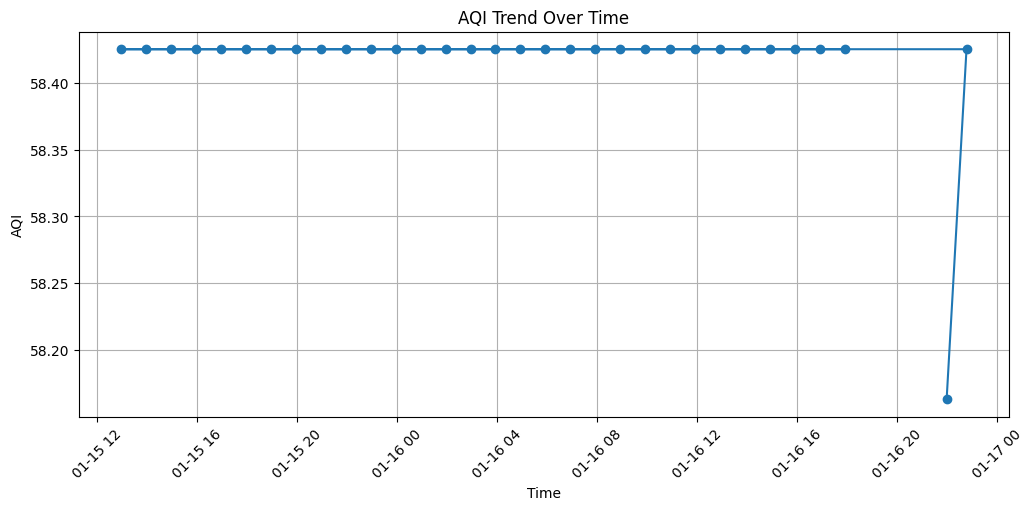

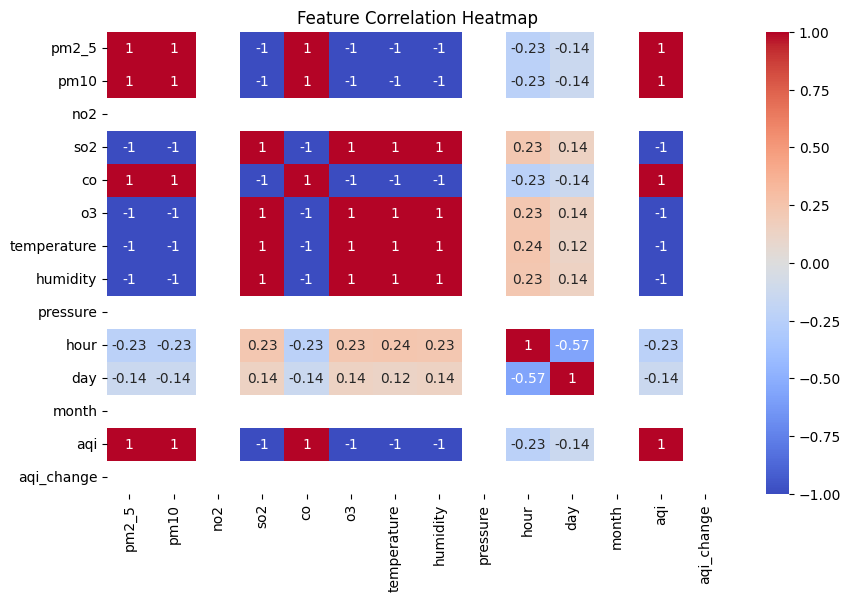

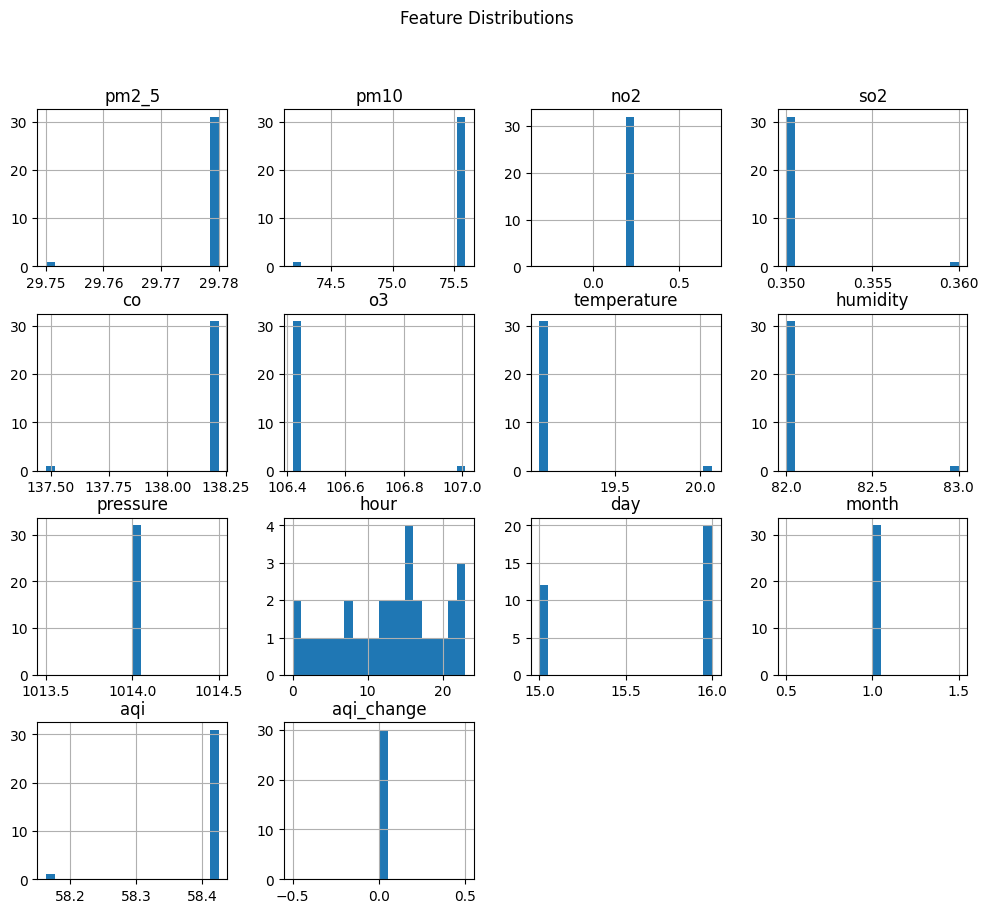

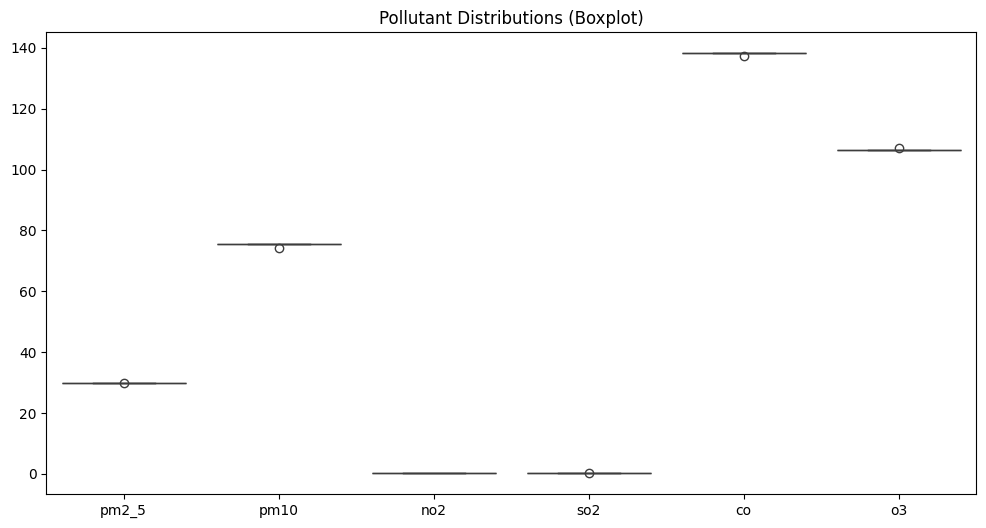

In [2]:
# 1️⃣ Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from dotenv import load_dotenv
import os

# 2️⃣ Load MongoDB connection
load_dotenv()
MONGO_URI = os.getenv("MONGO_URI")

client = MongoClient(MONGO_URI)
db = client["aqi_database"]
features_col = db["features"]

# 3️⃣ Load data
df = pd.DataFrame(list(features_col.find()))
df = df.drop(columns=["_id"])  # drop Mongo internal ID

# 4️⃣ Quick look
print("Data shape:", df.shape)
print(df.head())
print(df.describe())

# ---------------------------
# 5️⃣ Time-series trends
# ---------------------------
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Plot AQI trend over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["aqi"], marker='o', linestyle='-')
plt.title("AQI Trend Over Time")
plt.ylabel("AQI")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ---------------------------
# 6️⃣ Correlation heatmap
# ---------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ---------------------------
# 7️⃣ Histograms
# ---------------------------
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# ---------------------------
# 8️⃣ Boxplots for pollutants
# ---------------------------
pollutants = ["pm2_5","pm10","no2","so2","co","o3"]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[pollutants])
plt.title("Pollutant Distributions (Boxplot)")
plt.show()


In [4]:
df.shape


(32, 14)